# Transformaciones de Contraste

Se realizan mejoras en el constraste de la imágenes del conjunto de datos para intentar mejorar el rendimiento de clasificación de un modelo de red neuronal ResNet50, utilizado para la clasificación de los aguacates en las diferentes fases de maduración.

In [1]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
BASE_DIR = './t20_tam'

train_files = []
train_data = []
for dirname, _, filenames in os.walk(f'{BASE_DIR}/train'):
    for filename in filenames:
        try:
            train_data.append(cv.cvtColor(cv.imread(os.path.join(dirname, filename)), cv.COLOR_BGR2RGB))
            train_files.append(filename)
        except Exception as e:
            print(f'Unable to load: {filename} by exception \n {e}')

In [3]:
print(f'The images has shape {train_data[0].shape}')

The images has shape (800, 800, 3)


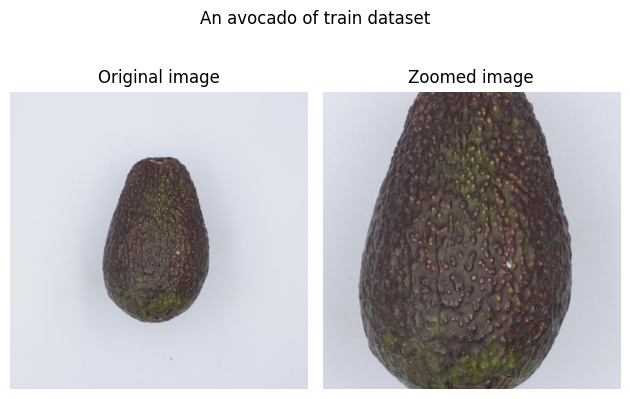

In [4]:
plt.subplot(1, 2, 1)
plt.imshow(train_data[0])
plt.axis('off')
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(train_data[0][200:601, 200:601, :])
plt.axis('off')
plt.title('Zoomed image')

plt.tight_layout()
plt.suptitle('An avocado of train dataset')
plt.show()

## Aplicando transformación de contraste para un ejemplo

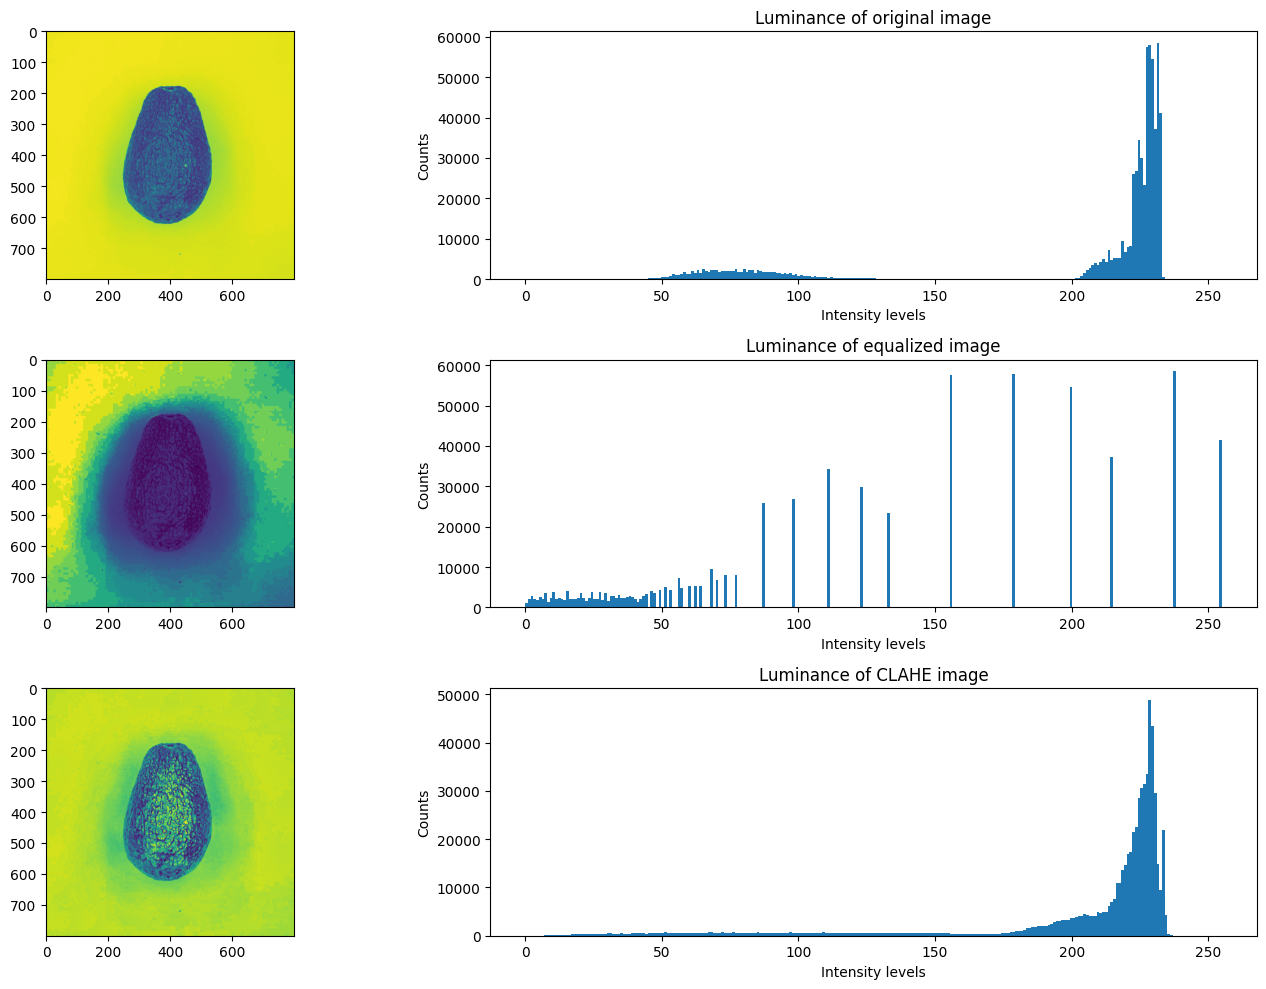

In [5]:
# Convert RGB to LAB space. For L layer.
temp = cv.cvtColor(train_data[0][:, :, :], cv.COLOR_RGB2LAB)
l, a, b = cv.split(temp)

plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.imshow(l)

# Compute histogram of L layer
plt.subplot(3, 2, 2)
plt.hist(np.ravel(l), bins=256, range=(0, 255))
plt.xlabel('Intensity levels')
plt.ylabel('Counts')
plt.title('Luminance of original image')

# Apply histogram equalization of image
temp2 = cv.equalizeHist(l)
plt.subplot(3, 2, 3)
plt.imshow(temp2)

# Compute histogram of L layer
plt.subplot(3, 2, 4)
plt.hist(np.ravel(temp2), bins=256, range=(0, 255))
plt.xlabel('Intensity levels')
plt.ylabel('Counts')
plt.title('Luminance of equalized image')

#Apply CLAHE method on L layer.
clahe = cv.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
temp3 = clahe.apply(l)
plt.subplot(3, 2, 5)
plt.imshow(temp3)

# Compute histogram after CLAHE.
plt.subplot(3, 2, 6)
plt.hist(np.ravel(temp3), bins=256, range=(0, 255))
plt.xlabel('Intensity levels')
plt.ylabel('Counts')
plt.title('Luminance of CLAHE image')

plt.tight_layout()
plt.show()

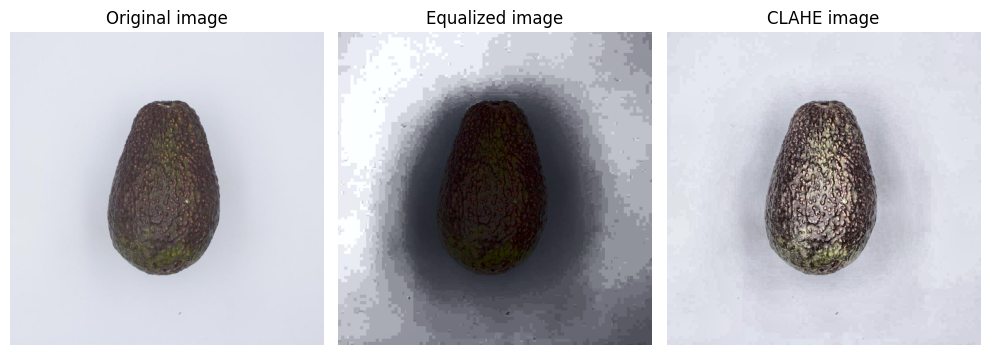

In [6]:
equ_img = cv.cvtColor(cv.merge((temp2, a, b)), cv.COLOR_LAB2RGB)
clahe_img = cv.cvtColor(cv.merge((temp3, a, b)), cv.COLOR_LAB2RGB)

plt.figure(figsize=(10, 8))
plt.subplot(1, 3, 1)
plt.imshow(train_data[0])
plt.axis('off')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.imshow(equ_img)
plt.axis('off')
plt.title('Equalized image')
plt.subplot(1, 3, 3)
plt.imshow(clahe_img)
plt.axis('off')
plt.title('CLAHE image')

plt.tight_layout()
plt.show()

Se elige usar CLAHE por la mejora visual en el constraste sobre el aguacate y la escena general.

In [7]:
def apply_CLAHE(image):
    lab_image = cv.cvtColor(image, cv.COLOR_RGB2LAB)
    l, a, b = cv.split(lab_image)
    clahe = cv.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
    l_clahe = clahe.apply(l)
    clahe_img = cv.cvtColor(cv.merge((l_clahe, a, b)), cv.COLOR_LAB2RGB)
    return clahe_img

def data_CLAHE(part, filenames, images):
    n = len(images)

    for i in range(n):
        try:
            cv.imwrite(f'./t20_tam-clahe/{part}/{filenames[i]}', cv.cvtColor(apply_CLAHE(images[i]), cv.COLOR_RGB2BGR))
        except Exception as e:
            print(f'Unable to write {filenames[i]}: \n {e}')

Aplicamos el CLAHE a todos los elementos de entrenamiento, prueba y validación. Cargamos los demás datos.

In [8]:
test_files = []
test_data = []
for dirname, _, filenames in os.walk(f'{BASE_DIR}/test'):
    for filename in filenames:
        try:
            test_data.append(cv.cvtColor(cv.imread(os.path.join(dirname, filename)), cv.COLOR_BGR2RGB))
            test_files.append(filename)
        except Exception as e:
            print(f'Unable to load: {filename} by exception \n {e}')

validation_files = []
validation_data = []
for dirname, _, filenames in os.walk(f'{BASE_DIR}/validation'):
    for filename in filenames:
        try:
            validation_data.append(cv.cvtColor(cv.imread(os.path.join(dirname, filename)), cv.COLOR_BGR2RGB))
            validation_files.append(filename)
        except Exception as e:
            print(f'Unable to load: {filename} by exception \n {e}')

In [9]:
data_CLAHE('train', train_files, train_data)
data_CLAHE('test', test_files, test_data)
data_CLAHE('validation', validation_files, validation_data)

Una muestra del resultado se vería:

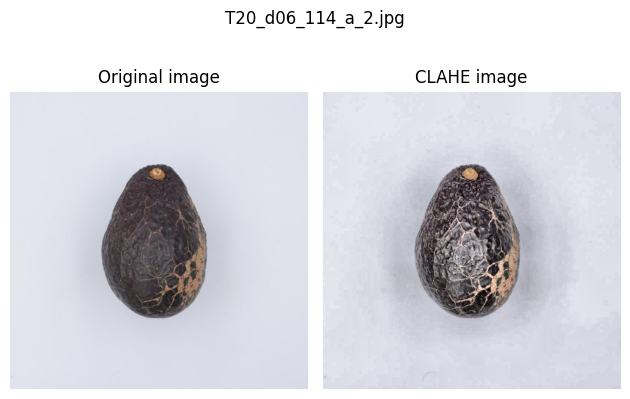

In [10]:
plt.subplot(1, 2, 1)
plt.imshow(test_data[0])
plt.axis('off')
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(apply_CLAHE(test_data[0]))
plt.axis('off')
plt.title('CLAHE image')

plt.tight_layout()
plt.suptitle(f'{test_files[2]}')
plt.show()